In [101]:
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import PIL
import numpy as np
import matplotlib.pyplot as plt

In [51]:
tulips=[]
file_lst=os.listdir('/content/flower_photos/flower_photos/tulips')
for i in file_lst:
  tulips.append('/content/flower_photos/flower_photos/tulips/'+i)

print(tulips)

['/content/flower_photos/flower_photos/tulips/2426849837_baefd9a518_n.jpg', '/content/flower_photos/flower_photos/tulips/65347450_53658c63bd_n.jpg', '/content/flower_photos/flower_photos/tulips/489506904_9b68ba211c.jpg', '/content/flower_photos/flower_photos/tulips/3433265727_0b8022e091.jpg', '/content/flower_photos/flower_photos/tulips/14015957646_8317a0f1d9_n.jpg', '/content/flower_photos/flower_photos/tulips/3421027755_cdb8fef8e8_n.jpg', '/content/flower_photos/flower_photos/tulips/3213012716_b4c0f7db88.jpg', '/content/flower_photos/flower_photos/tulips/7047408023_6e98fd1e3f.jpg', '/content/flower_photos/flower_photos/tulips/112334842_3ecf7585dd.jpg', '/content/flower_photos/flower_photos/tulips/141479422_5a6fa1fd1b_m.jpg', '/content/flower_photos/flower_photos/tulips/5546723510_39a5a10d3a_n.jpg', '/content/flower_photos/flower_photos/tulips/4838669164_ffb6f67139.jpg', '/content/flower_photos/flower_photos/tulips/8838914676_8ef4db7f50_n.jpg', '/content/flower_photos/flower_photos/tu

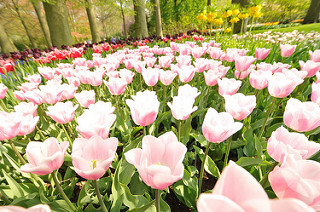

In [53]:
PIL.Image.open(tulips[67])

In [54]:
flower_labels={
    'roses' :0,
    'daisy' :1,
    'dandelion' :2,
    'sunflowers' :3,
    'tulip' : 4
}

In [73]:
x,y=[],[]

In [75]:
for images in daisy:
  img=cv2.imread(images)
  resized_img=cv2.resize(img,(180,180))
  x.append(resized_img)
  y.append(1)

In [76]:
for images in dandelion:
  img=cv2.imread(images)
  resized_img=cv2.resize(img,(180,180))
  x.append(resized_img)
  y.append(2)

In [77]:
for images in roses:
  img=cv2.imread(images)
  resized_img=cv2.resize(img,(180,180))
  x.append(resized_img)
  y.append(0)

In [78]:
for images in sunflowers:
  img=cv2.imread(images)
  resized_img=cv2.resize(img,(180,180))
  x.append(resized_img)
  y.append(3)

In [79]:
for images in tulips:
  img=cv2.imread(images)
  resized_img=cv2.resize(img,(180,180))
  x.append(resized_img)
  y.append(4)

In [81]:
x=np.array(x)
y=np.array(y)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [83]:
len(x_train)

2752

In [84]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [88]:
model=keras.Sequential([
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 914ms/step - accuracy: 0.2343 - loss: 10.5165
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 916ms/step - accuracy: 0.2334 - loss: 10.4265
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 79s 913ms/step - accuracy: 0.2417 - loss: 10.3298
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 78s 911ms/step - accuracy: 0.2476 - loss: 10.1849
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 83s 919ms/step - accuracy: 0.2254 - loss: 10.2889
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 947ms/step - accuracy: 0.2388 - loss: 10.4332
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 80s 921ms/step - accuracy: 0.2446 - loss: 10.3107
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 79s 917ms/step - accuracy: 0.2393 - loss: 10.3710
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 920ms/step - accuracy: 0.2495 - loss: 10.1282
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 919ms/step - accuracy: 0.2474 - loss: 10.3286


In [89]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - accuracy: 0.2479 - loss: 9.5813


[9.717876434326172, 0.25163400173187256]

In [119]:
data_aug=keras.Sequential([
    tf.keras.layers.RandomRotation(factor=(-0.2,0.3)),
    keras.layers.RandomZoom(0.9)
])

In [121]:
model=keras.Sequential([
    data_aug,
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.2171 - loss: 2.2678
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.2053 - loss: 1.6094
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.2151 - loss: 1.6094
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.2188 - loss: 1.6094
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.2177 - loss: 1.6094
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.2163 - loss: 1.6094
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.2149 - loss: 1.6094
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.2169 - loss: 1.6094
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.2073 - loss: 1.6094
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.2210 - loss: 1.6094
